In [1]:
import torch
import torchvision
from torchvision import transforms , datasets


In [2]:
train = datasets.MNIST("",train=True,download=True,
                       transform = transforms
                       .Compose([transforms.ToTensor()]))


test  = datasets.MNIST("",train=False,download=True,
                       transform = transforms
                       .Compose([transforms.ToTensor()]))

In [3]:
trainset = torch.utils.data.DataLoader(train, 
                                       batch_size=10,
                                       shuffle=True)

testset  = torch.utils.data.DataLoader(test, 
                                       batch_size=10,
                                       shuffle=True)

In [20]:
import torch.nn as nn
import torch.nn.functional as F

In [50]:
class Net(nn.Module):
    
    def __init__(self):
        super().__init__()
        # fc = fully connected
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 64)
        self.fc3 = nn.Linear(64, 64)
        self.fc4 = nn.Linear(64, 2)
    
    def forward(self,x):
        # relu = 0 or 1   _/``  <- relu  
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.fc4(x)
        return F.log_softmax(x,dim=1)
          
net = Net()

In [51]:
# for data in trainset:
#     data
#     break

In [52]:
# x = data[0][0]
# x = x.view(28,28)
# x = x.view(-1,28*28)  # flatten 1D array

In [53]:
# net.forward(x)

In [58]:
import torch.optim as optim
# lr = alpha (learning rate)
# Hello adam :)
optimizer = optim.Adam(net.parameters(),lr=0.001)

Epochs = 3

for epoch in range(Epochs):
    for data in trainset:
        # x image data , y = label
        # in general x = input , y = answer
        x,y = data
        net.zero_grad() 
        output = net.forward(x.view(-1,28*28))
        loss = F.nll_loss(output,y)
        loss.backward()
        optimizer.step()
    print(loss)
        
 

tensor(0.2142, grad_fn=<NllLossBackward>)
tensor(0.0123, grad_fn=<NllLossBackward>)
tensor(0.0011, grad_fn=<NllLossBackward>)


In [63]:
correct = 0
total = 0

with torch.no_grad():
    for data in trainset:
        x,y = data
        output = net.forward(x.view(-1,28*28))
        for idx,i in enumerate(output):
            if torch.argmax(i) == y[idx]:
                correct += 1
            total += 1

In [64]:
print("Accuracy : ",round(correct/total,3)*100,"%")

Accuracy :  98.3 %


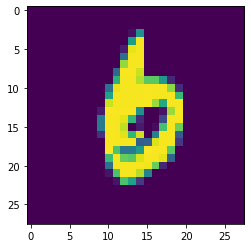

In [69]:
import matplotlib.pyplot as plt

plt.imshow(x[2].view(28,28))

tensor(6)
